In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Kik-Net Data/attributes_fixed.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,10,24,29,33,47,48,66,81,82,123,124) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df1=df[(df['MT_Magnitude_']>= 3.5) & (df['MT_Magnitude_'] <= 7)&(df['rjb_0'] >=30) &(df['rjb_0'] <=300)&(df['Tectonic_Garcia_'] ==1)]

In [ ]:
from scipy import stats
df1['d5_75_new'] = stats.gmean(df1.loc[:,['D5_75_EW2','D5_75_NS2']], axis=1)
df1['d5_95_new']=stats.gmean(df1.loc[:,['D5_95_EW2','D5_95_NS2']], axis=1)
df1['d20_80_new']=stats.gmean(df1.loc[:,['D20_80_EW2','D20_80_NS2']], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df1.head()

,X,Code,Adress,Vs30,Z1,ry_literature,MT_Magnitude_,rrup_0,repi_1_std,rjb_0,ry0_literature,ry0_1,repi_1,depth,rhypo_0_std,Focal_mechanism_kegan_,rjb_0_std,T_0_std,Origin_Time_,lastCorrectionDate,ry_1_std,Longitude_,Unit_,Region_Name_,rhypo_literature,ry_1,samplingFreq,rhypo_1,rjb_1_std,T_literature,U_0,lat,T_1_std,U_literature,rx_0,rjb_1,MT_Depth_,ry_0_std,originDate,Tectonic_Garcia_,rx_1,repi_0_std,Var_Red_,rrup_1_std,ry0_0,JMA_Depth_,rhypo_1_std,rx_literature,name_literature,repi_0,Strike_,Ztor_1_std,ry_0,rx_1_std,recordDate,rx_0_std,ry0_1_std,stationLon,rhypo_0,lon,T_0,originTime,Number_of_Stations_,Mo_,rrup_0_std,Ztor_0_std,repi_literature,scaleFactor,Dip_,direction,JMA_Magnitude_,Ztor_0,Ztor_1,stationLat,Focal_mechanism_Garcia_,Rake_,durationTime,T_1,U_1_std,U_1,ry0_0_std,rjb_literature,Ztor_literature,Tectonic_Zhoa_,rrup_1,Latitude_,mag,U_0_std,Origin_day_,rrup_literature,magnitude_literature,snr_EW1,snr_NS1,snr_EW2,snr_NS2,fLow_EW1,fLow_NS1,fLow_EW2,fLow_NS2,fHigh_EW1,fHigh_NS1,fHigh_EW2,fHigh_NS2,pga_EW1,pga_NS1,pga_EW2,pga_NS2,Ia_EW1,Ia_NS1,Ia_EW2,Ia_NS2,D5_75_EW1,D5_75_NS1,D5_75_EW2,D5_75_NS2,D5_75_sorted_EW1,D5_75_sorted_NS1,D5_75_sorted_EW2,D5_75_sorted_NS2,D20_80_EW1,D20_80_NS1,D20_80_EW2,D20_80_NS2,D5_95_EW1,D5_95_NS1,D5_95_EW2,D5_95_NS2,Vs5,Vs10,Vs20,Vs800,Vs50,Vs100,station,d5_75_new,d5_95_new,d20_80_new
117,117,GNMH069803170803,['/19980317080300/GNMH069803170803'],NaN,NaN,NaN,4.6,182.024225,2.840000e-14,175.643899,NaN,156.558009,176.303372,51,2.840000e-14,1.0,0.311570,0.246650,[b'08:03:37.31'],3/17/1998,0.325417,[b'141.2613'],[b'1e+15'],[b'E_OFF_FUKUSHIMA_PREF'],NaN,157.250174,200,183.660040,0.410882,NaN,-153.686180,37.036,0.599001,NaN,-84.579616,175.524271,[b'50'],0.304122,3/17/1998,1.0,80.917784,2.840000e-14,[b'94.59'],0.356592,153.686180,[b'51.44'],2.840000e-14,NaN,NaN,176.303372,[b'32;214'],50.949500,-154.377927,0.599001,3/17/1998,0.246650,0.357888,139.5443,183.660040,141.264,-84.579616,08:03:00\n,[b'3'],[b'8.25e+15'],0.382838,50.211738,NaN,0.000238,[b'68;22'],2,[b'4.5'],50.211738,50.949500,36.2441,[b'1'],[b'89;92'],60,80.917784,0.344639,157.942339,0.332184,NaN,NaN,[b'1'],182.316614,[b'37.0288'],4.5,0.332184,[b'1998/03/17'],NaN,NaN,0.984589,0.984589,0.821905,0.821905,0.050000,0.050000,0.137329,0.137329,100.0,100.0,38.876343,38.876343,0.210,0.161,2.079,1.801,1.130000e-06,5.880000e-07,8.800000e-05,0.000070,12.605,12.820,12.585,13.795,11.710,11.875,12.150,12.70,9.505,9.975,10.150,10.430,23.925,24.95,24.505,25.965,NaN,NaN,NaN,NaN,NaN,NaN,GNMH06,13.176118,25.224439,10.289048
118,118,IBRH089803170803,['/19980317080300/IBRH089803170803'],NaN,NaN,NaN,4.6,127.899132,4.260000e-14,118.072329,NaN,118.107596,118.899903,51,2.840000e-14,1.0,0.333678,0.245803,[b'08:03:37.31'],3/16/1998,0.327219,[b'141.2613'],[b'1e+15'],[b'E_OFF_FUKUSHIMA_PREF'],NaN,118.799760,200,129.566106,0.359917,NaN,-118.169326,37.036,0.596780,NaN,0.725821,118.045854,[b'50'],0.305721,3/17/1998,1.0,-3.106208,4.260000e-14,[b'94.59'],0.344641,118.169326,[b'51.44'],2.840000e-14,NaN,NaN,118.899903,[b'32;214'],50.949500,-118.861073,0.596780,3/17/1998,0.245803,0.359291,140.5621,129.566106,141.264,0.725821,08:03:00\n,[b'3'],[b'8.25e+15'],0.376394,50.211738,NaN,0.000238,[b'68;22'],2,[b'4.5'],50.211738,50.949500,36.1188,[b'1'],[b'89;92'],76,-3.106208,0.346585,119.491925,0.333930,NaN,NaN,[b'1'],128.148157,[b'37.0288'],4.5,0.333930,[b'1998/03/17'],NaN,NaN,0.427142,0.427142,0.972535,0.972535,0.100000,0.100000,0.050000,0.050000,100.0,100.0,100.000000,100.000000,0.693,0.447,7.377,8.138,7.680000e-06,2.400000e-06,5.983690e-04,0.000698,8.865,12.730,8.120,7.570,8.865,10.420,7.710,7.46,7.750,8.590,6.395,7.050,20.82,28.13,17.350,18.085,NaN,NaN,NaN,NaN,NaN,NaN,IBRH08,7.840179,17.713688,6.714518
119,119,NIGH019803170803,['/19980317080300/NIGH019803170803'],NaN,NaN,NaN,4.6,219.521708,8.530000e-14,214.523557,NaN,77.549788,214.772593,51,2.840000e-14,1.0,0.251701,0.244665,[b'08:03:37.31'],3/17/1998,0.322960,[b'141.2613'],[b'1e+15'],[b'E_OFF_FUKUSHIMA_PREF'],NaN,78.241953,200,220

In [ ]:
df2=df1[['MT_Magnitude_','rrup_0','Vs30','d5_75_new','d5_95_new','d20_80_new']]

In [ ]:
df2.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
input_var=df2[['MT_Magnitude_','rrup_0']]

input_var.head()

,MT_Magnitude_,rrup_0
242,4.3,201.327851
243,4.3,267.443533
244,4.3,147.362858
245,4.3,137.572160
246,4.3,135.336606


In [ ]:
input_var['rrup_0'].max()

306.8560082

In [ ]:
y_var=df2[['d5_75_new']]
y_var=np.log(y_var)
y_var=np.array(y_var)
y_var

array([[2.41763892],
       [1.77300804],
       [1.82345874],
       ...,
       [2.81748265],
       [3.13713943],
       [2.73623785]])

In [ ]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(input_var,y_var,test_size=0.3, random_state=99)

In [ ]:
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)

In [ ]:
from tensorflow.keras.optimizers import Adam
import keras.models
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
tf.random.set_seed(55)

In [ ]:
from numpy.random import seed
seed(5661)

In [ ]:
model=Sequential([Dense(units=5, input_shape=(2,), activation='relu'),
                  Dense(units=1, activation='linear')
                 ])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')

In [ ]:
history=model.fit(X_train, y_train,batch_size=64, epochs=20, validation_split=0.2, verbose=1)


Epoch 1/20
577/577 [==============================] - 15s 2ms/step - loss: 4.6209 - val_loss: 1.0294
Epoch 2/20
577/577 [==============================] - 1s 1ms/step - loss: 0.7555 - val_loss: 0.4385
Epoch 3/20
577/577 [==============================] - 1s 1ms/step - loss: 0.4070 - val_loss: 0.3223
Epoch 4/20
577/577 [==============================] - 1s 1ms/step - loss: 0.3138 - val_loss: 0.2661
Epoch 5/20
577/577 [==============================] - 1s 2ms/step - loss: 0.2680 - val_loss: 0.2363
Epoch 6/20
577/577 [==============================] - 1s 1ms/step - loss: 0.2376 - val_loss: 0.2249
Epoch 7/20
577/577 [==============================] - 1s 1ms/step - loss: 0.2311 - val_loss: 0.2157
Epoch 8/20
577/577 [==============================] - 1s 1ms/step - loss: 0.2167 - val_loss: 0.2127
Epoch 9/20
577/577 [==============================] - 1s 1ms/step - loss: 0.2200 - val_loss: 0.2118
Epoch 10/20
577/577 [==============================] - 1s 1ms/step - loss: 0.2169 - val_loss: 0.211

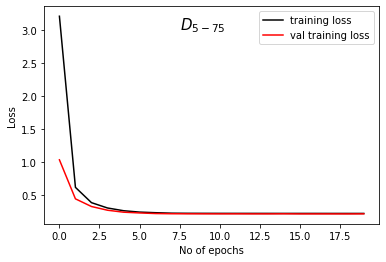

In [ ]:
history_dict=history.history
    
loss_values= history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
    
plt.plot(loss_values, 'black', label='training loss')
plt.plot(val_loss_values, 'red', label='val training loss')
plt.legend()
plt.xlabel('No of epochs')
plt.ylabel('Loss')
plt.text(7.5,3, '$D_{5-75}$', fontsize=15)

plt.show()

Text(2, 3500, '$D_{5-75}$')

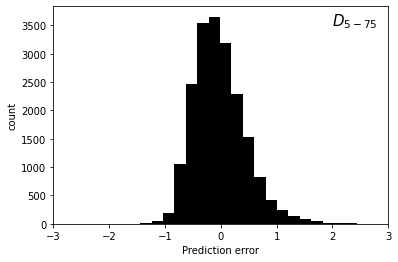

In [ ]:
y_test_pred=model.predict(X_test)
error=y_test_pred-y_test
plt.hist(error, bins=25,color='black')
plt.xlabel('Prediction error')
plt.ylabel('count')
plt.xlim(-3,3)
plt.text(2,3500, '$D_{5-75}$', fontsize=15)

In [ ]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

<Figure size 432x288 with 0 Axes>

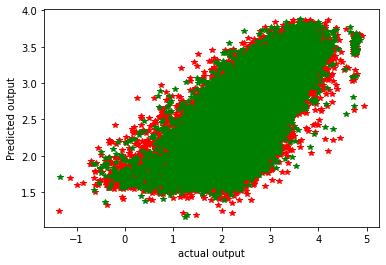

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(y_train,y_train_pred, '*r')
plt.plot(y_test, y_test_pred, '*g')
plt.xlabel('actual output')
plt.ylabel('Predicted output')
plt.figure()

In [ ]:
0